In [2]:
"""
    Importing Libraries
"""

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
from scipy import stats
from numpy.polynomial.polynomial import polyfit
plt.style.use('fivethirtyeight')


In [29]:
"""
    Reading the csv
"""

df = pd.read_csv('/Users/ishnakaul/Documents/Quarter3/Software/Project/boston_all_years_nan.csv')
df.head()

,10k,15k,20k,25k,30k,35k,40k,5k,age,bib,...,genderdiv,half,name,official_time,overall,pace,state,year,age_bucket,age_range
0,1090.8,NaN,2328.0,2992.2,3724.2,4483.8,5133.0,534.0,28,W1,...,9.0,2455.8,"Cassidy, Josh R.",5454.0,9,208.2,ON,2013,3,25-29
1,1854.0,NaN,3691.2,4636.2,5578.2,6526.8,7486.2,954.0,30,1,...,5.0,3894.0,"Korir, Wesley",7950.0,5,304.2,NaN,2013,4,30-34
2,1854.0,NaN,3691.8,4633.8,5563.2,6520.8,7426.8,955.8,23,2,...,1.0,3895.2,"Desisa, Lelisa",7822.2,1,298.8,NaN,2013,2,20-24
3,1123.8,NaN,2392.8,3030.0,3681.0,4380.0,5005.8,538.8,32,W2,...,5.0,2520.0,"Fearnley, Kurt H.",5305.8,5,202.8,NaN,2013,4,30-34
4,1090.8,NaN,2313.0,2925.0,3595.2,4300.8,4912.8,535.2,39,W3,...,3.0,2434.2,"Hokinoue, Kota",5233.2,3,199.8,NaN,2013,5,35-39


In [4]:
"""
    Displaying the info
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127545 entries, 0 to 127544
Data columns (total 26 columns):
10k              127355 non-null float64
15k              79346 non-null float64
20k              127392 non-null float64
25k              127226 non-null float64
30k              127400 non-null float64
35k              127405 non-null float64
40k              127414 non-null float64
5k               127198 non-null float64
age              127545 non-null int64
bib              127545 non-null object
citizen          5434 non-null object
city             127542 non-null object
country          127545 non-null object
division         127545 non-null int64
gender           127545 non-null object
gender_place     79397 non-null float64
genderdiv        48148 non-null float64
half             127395 non-null float64
name             127545 non-null object
official_time    127545 non-null float64
overall          127545 non-null int64
pace             127545 non-null float64
stat

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


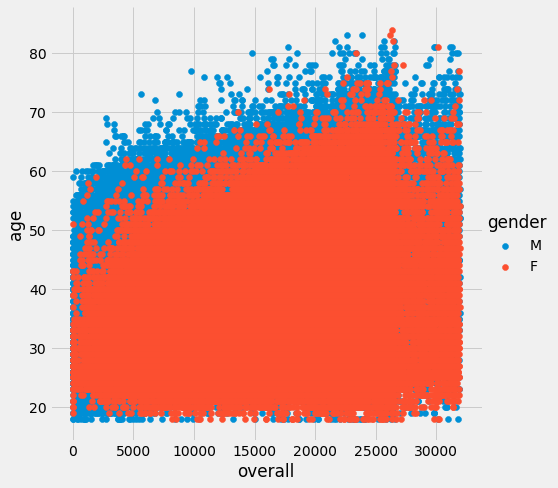

In [30]:
"""
    Checking Rank vs age
"""

sns.FacetGrid(df, hue="gender", size=7) \
  .map(plt.scatter, "overall", "age") \
  .add_legend()

In [31]:
"""
Negative the time ratio between the first and a second half of the race.
A value smaller than 1 implies a negative split - i.e, the 2nd part of the race was faster than the first one. 
And inversely, a value which is larger than 1 indicates the more intuitive (and evidently more common) positive split
"""

df['split_ratio'] = (df['official_time'] - df['half'])/(df['half'])


/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Split Distribution for Boston Data (Negative split when < 1)')

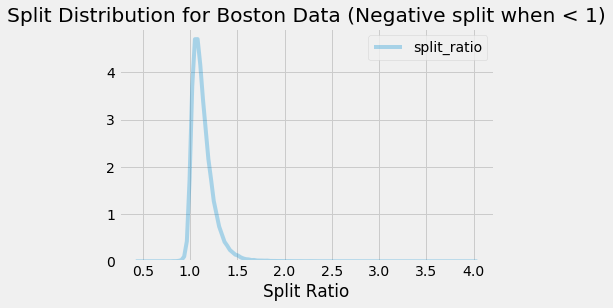

In [32]:
"""
    Distribution of split ratio overall
"""
sns.kdeplot(df.split_ratio, alpha =0.3)
plt.xlabel('Split Ratio')
plt.title('Split Distribution for Boston Data (Negative split when < 1)')

Not a lot of runners chose negative split - They run the 2nd half slower than the first half. Some of them maintained a constant pace (people with ratio 1). There's a long tail on the right of runners who slowed down significantly in second half. On the left of 1 we can see runners who did in fact run a negative split.

Text(0.5,1,'Split and performance')

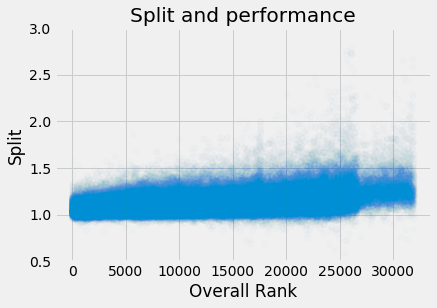

In [33]:
"""
Overall rank vs split ratio
"""

plt.plot(df.overall,df.split_ratio,'o', alpha = 0.01)
plt.ylim([0.5,3])
plt.xlabel('Overall Rank')
plt.ylabel('Split')
plt.title('Split and performance')

Moderate increase in the split ratio with the overall rank (that is - the lower the runner is ranked, the more negative his or her split is). The most dominant trend is the growing variance in split ratio with the overall rank, especially when the ratio is above 1. This means two things:
1. Most runners with higher ranks ran positive split than negative split
2. Bad runners with rank>15k are all over the place
3. For good rank people, a few of them run negative splits, however, the ratio of positive split increases as rank increases
4. Majority with least ranks ran positive split

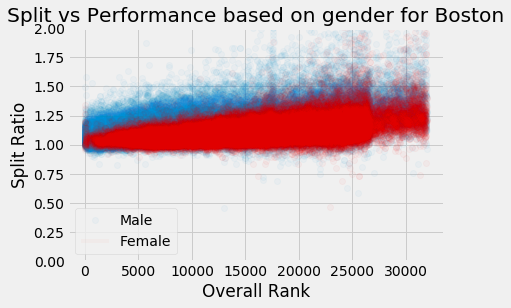

In [71]:
"""
Overall rank vs split ratio divided by gender
"""

x1 = df.overall[df['gender'] == "M"]
x2 = df.split_ratio[df['gender'] == "M"]
slope1, intercept1, r_value, p_value, std_err = stats.linregress(x1,x2)
line1 = slope1*x1+intercept1
y1 = df.overall[df['gender'] == "F"]
y2 = df.split_ratio[df['gender'] == "F"]
slope2, intercept2, r_value, p_value, std_err = stats.linregress(y1,y2)
line2 = slope2*y1+intercept2

plt.plot(x1,x2,'o', x1, line1, alpha = 0.03)

plt.plot(y1,y2,'o', y1, line2, alpha = 0.03, color = "r")

plt.ylim([0,2])
plt.xlabel('Overall Rank')
plt.ylabel('Split Ratio')
plt.title('Split vs Performance based on gender for Boston')
plt.legend(['Male', 'Female'])
#plt.plot(x1, b + m * x1, '-', color = "black")
#plt.plot(y1, a + c * y1, '-', color = "black")

In [35]:
"""
    Count of men vs women
"""

women_count = len(df.gender[df['gender'] == "F"])
men_count = len(df.gender[df['gender'] == "M"])
print("number of women", women_count)
print("number of men",men_count)

number of women 56934
number of men 70611


Observation:
1. We can clearly see increasing trend of ranks with splits

2. Variance in split is higher as overall rank progresses 

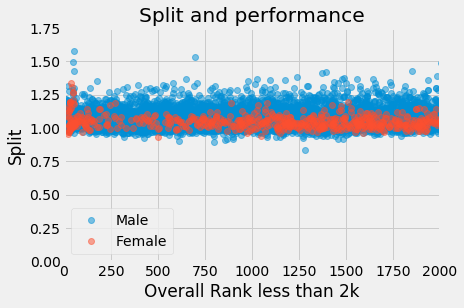

In [36]:
"""
Overall rank below 2000 vs split ratio divided by gender
"""

x1 = df.overall[df['gender'] == "M"]
x2 = df.split_ratio[df['gender'] == "M"]
y1 = df.overall[df['gender'] == "F"]
y2 = df.split_ratio[df['gender'] == "F"]

plt.plot(x1,x2,'o', alpha = 0.5)
plt.plot(y1,y2,'o', alpha = 0.5)


plt.ylim([0,1.75])
plt.xlim([0,2000])
plt.xlabel('Overall Rank less than 2k')
plt.ylabel('Split')
plt.title('Split and performance')
plt.legend(["Male", "Female"])

Observation:

1. We can clearly see increasing trend of ranks with splits
2. More men perform negative split than women
3. Variance in split is higher as overall rank progresses

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.5, 2)

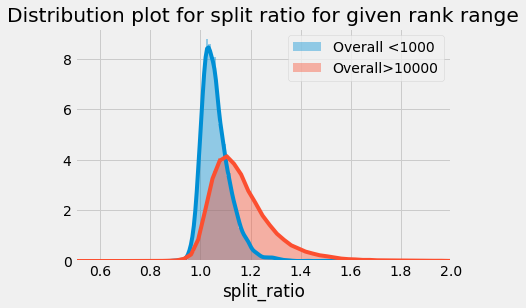

In [37]:
"""
distribution of splits for ranks less than 1000 and greater than 10000
"""

df_split = df[df.half > 0]
sns.distplot(df_split.split_ratio[df_split.overall < 1000],np.arange(0.6,3,0.01))
sns.distplot(df_split.split_ratio[df_split.overall > 10000],np.arange(0.6,3,0.01))
plt.legend(['Overall <1000','Overall>10000'])
plt.title('Distribution plot for split ratio for given rank range')
plt.xlim([0.5,2])

The better runners have a more negative (or less positive, to be more accurate) than worse runners.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

Text(0.5,1,'Fast runners are more stable (Boston Data)')

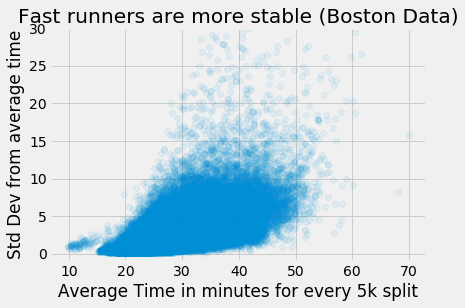

In [73]:
"""
Do better runners keep a more constant pace along the race?
"""
# Time for each 5k splits
df_split["diff1"] = df_split["10k"]-df_split["5k"]
df_split["diff2"] = df_split["15k"]-df_split["10k"]
df_split["diff3"] = df_split["20k"]-df_split["15k"]
df_split["diff4"] = df_split["25k"]-df_split["20k"]
df_split["diff5"] = df_split["30k"]-df_split["25k"]
df_split["diff6"] = df_split["35k"]-df_split["30k"]
df_split["diff7"] = df_split["40k"]-df_split["35k"]

columns = ['diff1','diff2','diff3','diff4','diff5','diff6','diff7']
df_split['avg'] = df_split[columns].mean(axis = 1)/60
df_split['stdev'] = df_split[columns].std(axis = 1)/60

plt.plot(df_split.avg,df_split.stdev,'o', alpha = 0.07)
plt.ylim([-1,30])
plt.xlabel('Average Time in minutes for every 5k split')
plt.ylabel('Std Dev from average time')
plt.title('Fast runners are more stable (Boston Data)')


In [56]:
"""
    Checking Random Forest for feature importance
"""

ar = np.array( [df_split['diff1'],df_split['diff2'],df_split['diff3'],df_split['diff4'],df_split['diff5'],df_split['diff6'],df_split['diff7']])
ar = ar.reshape((ar.shape[1],7))          
mask = np.all(np.isnan(ar), axis=1)
ar = ar[~mask]
mask2 = np.all(np.isfinite(ar), axis=1)
ar = ar[mask2]
ar.shape


(112157, 7)

In [57]:
br = np.array([df_split['official_time']])
br = br.reshape((br.shape[1],1))
br = br[~mask]
br = br[mask2]
br.shape

(112157, 1)

In [64]:
# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=150, max_depth=50, random_state=0)

# Train the classifier
clf.fit(ar, br)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

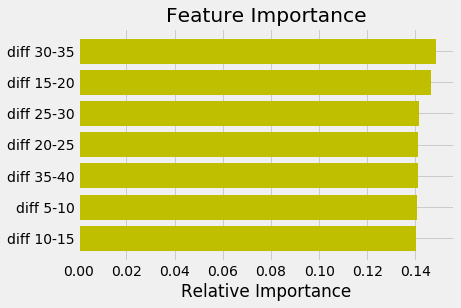

In [67]:
"""
    Calculating the importance
"""

importances = clf.feature_importances_
indices = np.argsort(importances)
features = ["diff 5-10", "diff 10-15", "diff 15-20", "diff 20-25", "diff 25-30", "diff 30-35", "diff 35-40" ]
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observation: We can see the faster the runner, the more stable they are over time (less deviation of speed)

Text(0.5,1,'Participants per age bucket')

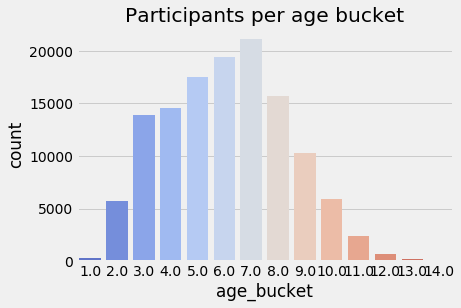

In [117]:
"""
    Participants per age bucket
"""

g = sns.countplot('age_bucket', data=df, palette="coolwarm")

g.set_title("Participants per age bucket")

Text(0.5,1,'Participants per Age & Gender for Boston')

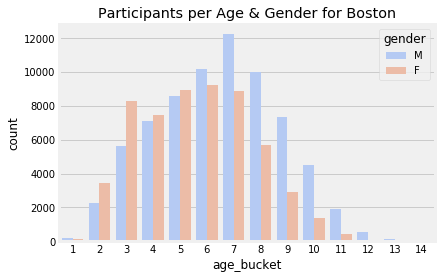

In [29]:
"""
    Gender and age based participation
"""

g = sns.countplot('age_bucket', data=df, palette="coolwarm", hue='gender')
g.set_title("Participants per Age & Gender for Boston")

Text(0.5,1,'Distribution of finish times(in mins) per Age group')

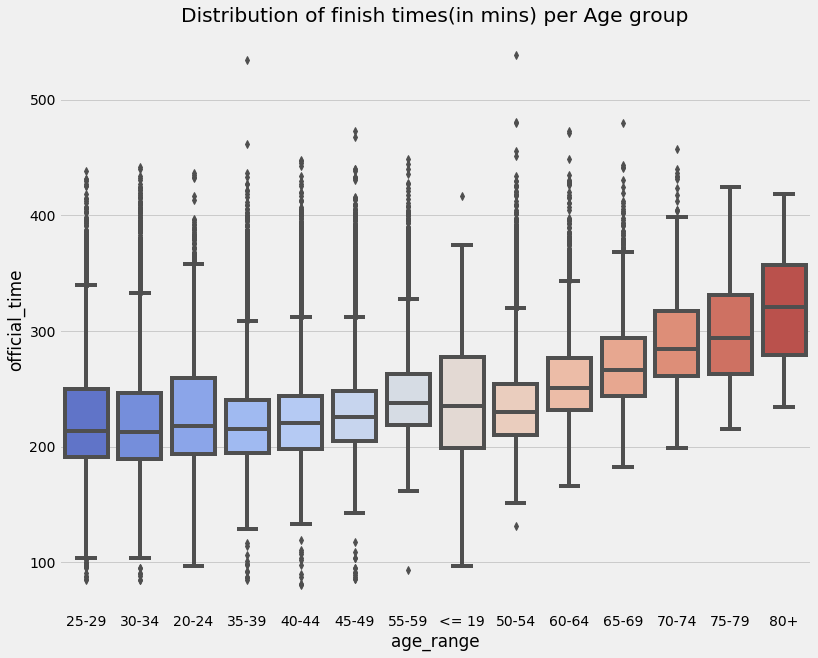

In [94]:
"""
    Distribution of finish times per Age group
"""
g = sns.boxplot(df['age_range'], df['official_time']/60, palette="coolwarm")
plt.rcParams['figure.figsize']=(12,8)
g.set_title("Distribution of finish times(in mins) per Age group")


Text(0,0.5,'Age Bucket')

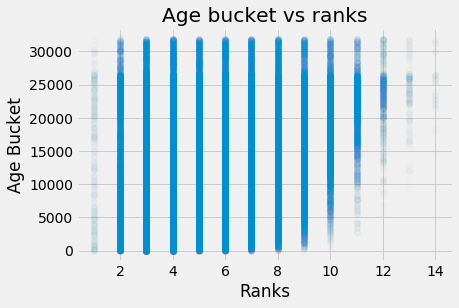

In [46]:
"""
    Age bucket vs ranks
"""

plt.plot(df.age_bucket,df.overall,'o', alpha = 0.01)
plt.title("Age bucket vs ranks")
plt.xlabel("Ranks")
plt.ylabel("Age Bucket")

In [3]:
"""
    Reading the csv
"""

df = pd.read_csv('data_agg.csv')
df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,10,11,18,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,10k,15k,20k,25k,30k,35k,40k,5k,age,bib,...,half,host_city,name,official_time,overall,state,year,age_range,country_name,code
0,1090.8,NaN,2328.0,2992.2,3724.2,4483.8,5133.0,534.0,28.0,1,...,2455.8,Boston,"Cassidy, Josh R.",5454.0,9.0,ON,2013,25-29,NaN,CAN
1,1854.0,NaN,3691.2,4636.2,5578.2,6526.8,7486.2,954.0,30.0,1,...,3894.0,Boston,"Korir, Wesley",7950.0,5.0,NaN,2013,30-34,NaN,KEN
2,1854.0,NaN,3691.8,4633.8,5563.2,6520.8,7426.8,955.8,23.0,2,...,3895.2,Boston,"Desisa, Lelisa",7822.2,1.0,NaN,2013,20-24,NaN,ETH
3,1123.8,NaN,2392.8,3030.0,3681.0,4380.0,5005.8,538.8,32.0,2,...,2520.0,Boston,"Fearnley, Kurt H.",5305.8,5.0,NaN,2013,30-34,NaN,AUS
4,1090.8,NaN,2313.0,2925.0,3595.2,4300.8,4912.8,535.2,39.0,3,...,2434.2,Boston,"Hokinoue, Kota",5233.2,3.0,NaN,2013,35-39,NaN,JPN


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


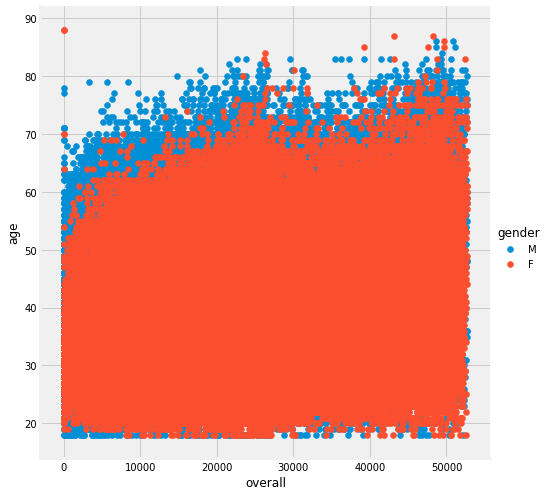

In [4]:
"""
    Checking Rank vs age
"""

sns.FacetGrid(df, hue="gender", size=7) \
  .map(plt.scatter, "overall", "age") \
  .add_legend()

In [5]:
"""
Negative the time ratio between the first and a second half of the race.
A value smaller than 1 implies a negative split - i.e, the 2nd part of the race was faster than the first one. 
And inversely, a value which is larger than 1 indicates the more intuitive (and evidently more common) positive split
"""

df['split_ratio'] = (df['official_time'] - df['half'])/(df['half'])


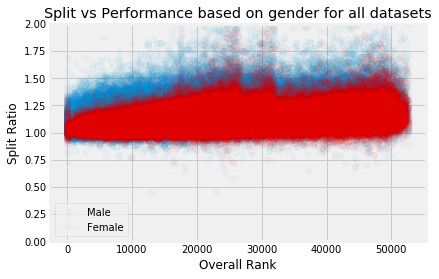

In [9]:
"""
Overall rank vs split ratio divided by gender
"""

x1 = df.overall[df['gender'] == "M"]
x2 = df.split_ratio[df['gender'] == "M"]
slope1, intercept1, r_value, p_value, std_err = stats.linregress(x1,x2)
line1 = slope1*x1+intercept1
y1 = df.overall[df['gender'] == "F"]
y2 = df.split_ratio[df['gender'] == "F"]
slope2, intercept2, r_value, p_value, std_err = stats.linregress(y1,y2)
line2 = slope2*y1+intercept2

plt.plot(x1,x2,'o', x1, line1, alpha = 0.03)

plt.plot(y1,y2,'o', y1, line2, alpha = 0.03, color = "r")

plt.ylim([0,2])
plt.xlabel('Overall Rank')
plt.ylabel('Split Ratio')
plt.title('Split vs Performance based on gender for all datasets')
plt.legend(['Male', 'Female'])
#plt.plot(x1, b + m * x1, '-', color = "black")
#plt.plot(y1, a + c * y1, '-', color = "black")

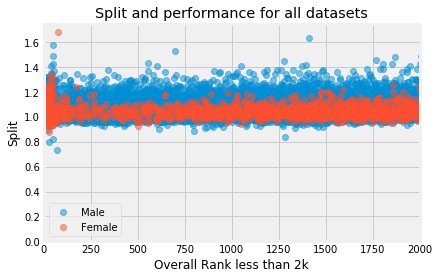

In [8]:
"""
Overall rank below 2000 vs split ratio divided by gender
"""

x1 = df.overall[df['gender'] == "M"]
x2 = df.split_ratio[df['gender'] == "M"]
y1 = df.overall[df['gender'] == "F"]
y2 = df.split_ratio[df['gender'] == "F"]

plt.plot(x1,x2,'o', alpha = 0.5)
plt.plot(y1,y2,'o', alpha = 0.5)


plt.ylim([0,1.75])
plt.xlim([0,2000])
plt.xlabel('Overall Rank less than 2k')
plt.ylabel('Split')
plt.title('Split and performance for all datasets')
plt.legend(["Male", "Female"])

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.5, 2)

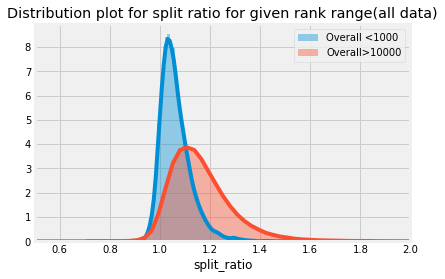

In [13]:
"""
distribution of splits for ranks less than 1000 and greater than 10000
"""

df_split = df[df.half > 0]
sns.distplot(df_split.split_ratio[df_split.overall < 1000],np.arange(0.6,3,0.01))
sns.distplot(df_split.split_ratio[df_split.overall > 10000],np.arange(0.6,3,0.01))
plt.legend(['Overall <1000','Overall>10000'])
plt.title('Distribution plot for split ratio for given rank range(all data)')
plt.xlim([0.5,2])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

Text(0.5,1,'Fast runners are more stable (All Data)')

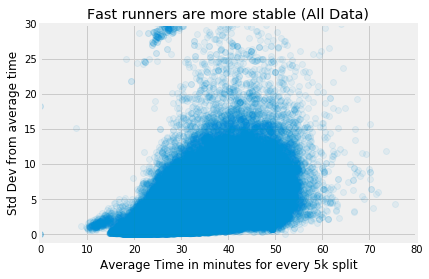

In [16]:
"""
Do better runners keep a more constant pace along the race?
"""
# Time for each 5k splits
df_split["diff1"] = df_split["10k"]-df_split["5k"]
df_split["diff2"] = df_split["15k"]-df_split["10k"]
df_split["diff3"] = df_split["20k"]-df_split["15k"]
df_split["diff4"] = df_split["25k"]-df_split["20k"]
df_split["diff5"] = df_split["30k"]-df_split["25k"]
df_split["diff6"] = df_split["35k"]-df_split["30k"]
df_split["diff7"] = df_split["40k"]-df_split["35k"]

columns = ['diff1','diff2','diff3','diff4','diff5','diff6','diff7']
df_split['avg'] = df_split[columns].mean(axis = 1)/60
df_split['stdev'] = df_split[columns].std(axis = 1)/60

plt.plot(df_split.avg,df_split.stdev,'o', alpha = 0.07)
plt.ylim([-1,30])
plt.xlim([0,80])
plt.xlabel('Average Time in minutes for every 5k split')
plt.ylabel('Std Dev from average time')
plt.title('Fast runners are more stable (All Data)')


In [31]:
"""
    Checking Random Forest for feature importance
"""

ar = np.array( [df_split['diff1'],df_split['diff2'],df_split['diff3'],df_split['diff4'],df_split['diff5'],df_split['diff6'],df_split['diff7']])
ar = ar.reshape((ar.shape[1],7)) 
br = np.array([df_split['official_time']])
br = br.reshape((br.shape[1],1))
mask = np.all(np.isnan(ar), axis=1)
ar = ar[~mask]
br = br[~mask]
mask2 = np.all(np.isfinite(ar), axis=1)
ar = ar[mask2]
br = br[mask2]
mask3 = np.all(np.isfinite(br), axis=1)
ar = ar[mask3]
br=br[mask3]
ar.shape


(312222, 7)

In [32]:

br.shape

(312222, 1)

In [33]:
# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=150, max_depth=50, random_state=0)

# Train the classifier
clf.fit(ar, br)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

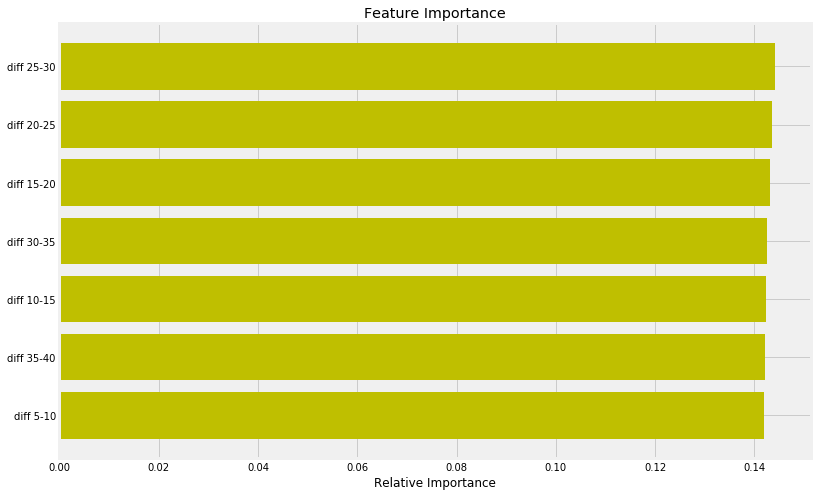

In [34]:
"""
    Calculating the importance
"""

importances = clf.feature_importances_
indices = np.argsort(importances)
features = ["diff 5-10", "diff 10-15", "diff 15-20", "diff 20-25", "diff 25-30", "diff 30-35", "diff 35-40" ]
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(0.5,1,'Distribution of finish times(in mins) per Age group [all marathons]')

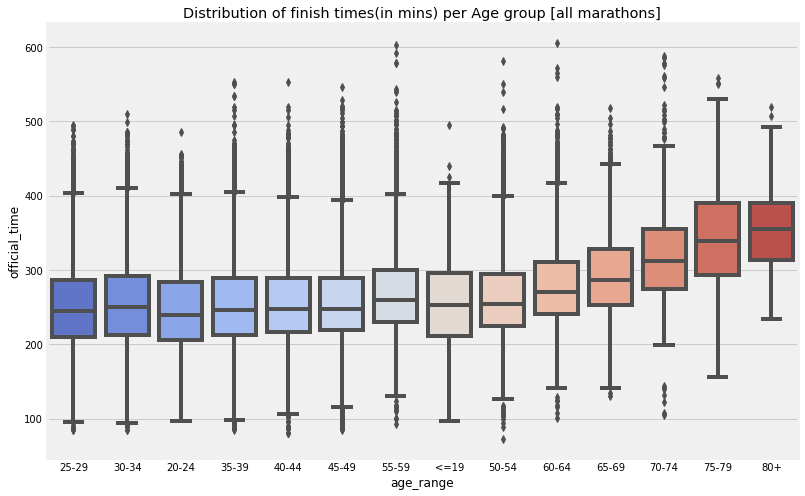

In [27]:
"""
    Distribution of finish times per Age group
"""
g = sns.boxplot(df['age_range'], df['official_time']/60, palette="coolwarm")
plt.rcParams['figure.figsize']=(12,8)
g.set_title("Distribution of finish times(in mins) per Age group [all marathons]")
